<a href="https://colab.research.google.com/github/cjffcnx/Ai-Lab1-SrijanGajurel/blob/main/Copy_of_Vacuum_cleaner_as_reflex_agent(021_383).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Vacuum cleaner as reflex agent


In [1]:
import random
import time
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from IPython.display import display, clear_output
import ipywidgets as widgets

class VacuumAgent:
    def __init__(self, delay=0.3):
        self.rows = 10
        self.cols = 10
        self.environment = [[random.randint(0, 1) for _ in range(self.cols)] for _ in range(self.rows)]
        self.current_pos = [random.randint(0, self.rows - 1), random.randint(0, self.cols - 1)]
        self.steps = 0
        self.done = False
        self.delay = delay

        # Add control buttons
        self.button_step = widgets.Button(description="Next Step", button_style='info')
        self.button_auto = widgets.Button(description="Auto Clean", button_style='success')
        self.button_step.on_click(self.step)
        self.button_auto.on_click(self.run_until_done)

        self.show()

    def action(self):
        if self.environment[self.current_pos[0]][self.current_pos[1]] == 1:
            self.environment[self.current_pos[0]][self.current_pos[1]] = 0
            return True
        return False

    def move(self):
        if self.current_pos[1] < self.cols - 1:
            self.current_pos[1] += 1
        elif self.current_pos[0] < self.rows - 1:
            self.current_pos[0] += 1
            self.current_pos[1] = 0
        else:
            if not self.is_done():
                self.current_pos = [0, 0]
            else:
                self.done = True

    def is_done(self):
        return all(cell == 0 for row in self.environment for cell in row)

    def visualize(self):
        fig, ax = plt.subplots(figsize=(5, 5))
        ax.set_xlim(0, self.cols)
        ax.set_ylim(0, self.rows)
        ax.set_xticks(range(self.cols + 1))
        ax.set_yticks(range(self.rows + 1))
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.grid(True)

        for i in range(self.rows):
            for j in range(self.cols):
                color = 'lightgray' if self.environment[i][j] == 1 else 'white'
                rect = patches.Rectangle((j, self.rows - i - 1), 1, 1, linewidth=1,
                                         edgecolor='black', facecolor=color)
                ax.add_patch(rect)

        ai, aj = self.current_pos
        agent_rect = patches.Rectangle((aj, self.rows - ai - 1), 1, 1, linewidth=1,
                                       edgecolor='red', facecolor='red', alpha=0.6)
        ax.add_patch(agent_rect)

        ax.set_title(f"Step: {self.steps}")
        plt.show()

    def step(self, _=None):
        if self.done or self.is_done():
            clear_output(wait=True)
            print(f"✅ Cleaning completed in {self.steps} steps!")
            self.done = True
            self.show()
            return

        if self.action():
            print(f"🧹 Cleaned cell at position {self.current_pos}")
        else:
            print(f"✔️ Cell {self.current_pos} is already clean")

        self.move()
        self.steps += 1

        clear_output(wait=True)
        self.show()

    def run_until_done(self, _=None):
        while not self.done and not self.is_done():
            self.step()
            time.sleep(self.delay)
        if self.is_done():
            print(f"✅ Finished cleaning in {self.steps} steps!")

    def show(self):
        display(widgets.HBox([self.button_step, self.button_auto]))
        self.visualize()


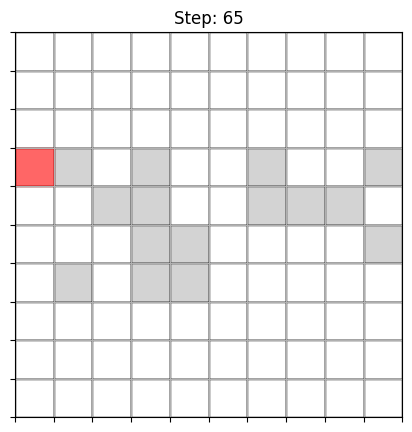

In [2]:
agent = VacuumAgent(delay=0.5)